<a href="https://colab.research.google.com/github/Isaac-LaF/PHSX-Lab-2/blob/main/lenses_images_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

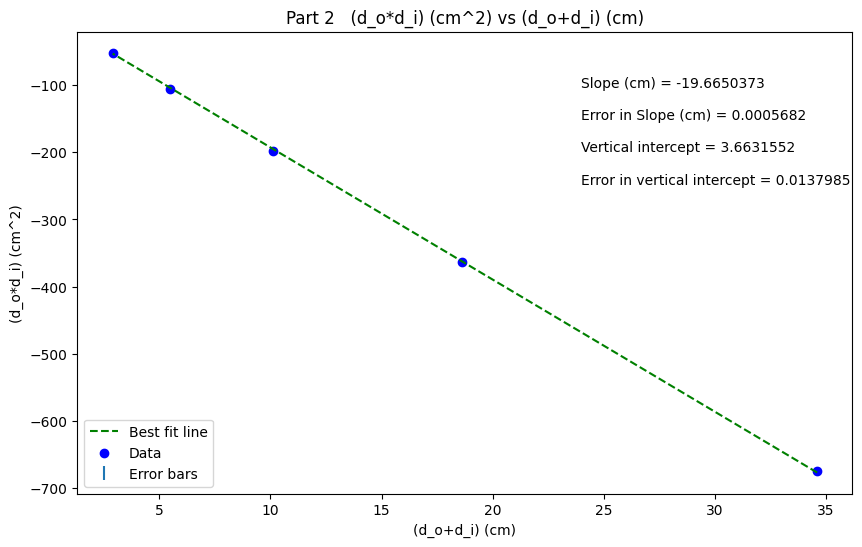

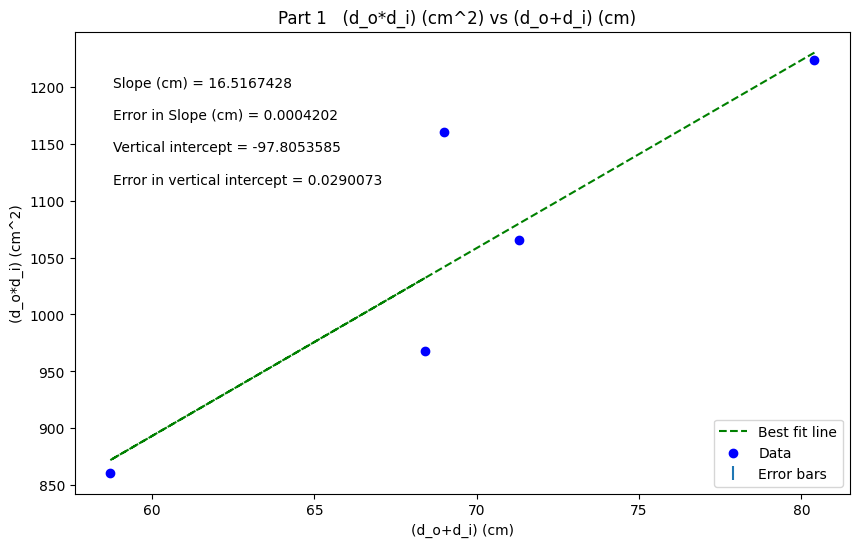

In [20]:
# Import packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------------------- #
# Reusable plot function with optional annotation positions and legend location
def plot_data(
    x, y, dy, plot_title, x_label, y_label, slope_units,
    xpos=None, ypos=None, annotation_placement=1, legend_loc='best'
):
    # Best-fit line
    b, m = np.polynomial.polynomial.polyfit(x, y, 1, w=dy)
    fit = b + m * x

    # Error calculation
    def Delta(x, dy):
        return (sum(1/dy**2)) * (sum(x**2/dy**2)) - (sum(x/dy**2))**2

    D = Delta(x, dy)
    dm = np.sqrt(1/D * sum(1/dy**2))
    db = np.sqrt(1/D * sum(x**2/dy**2))

    def LLSFD2(x, y, dy):
        return sum(((y - b - m * x) / dy) ** 2)

    N = LLSFD2(x, y, dy)

    # Default annotation placement if not custom
    if xpos is None:
        xpos = 0.75 if annotation_placement in [1, 4] else 0.05
    if ypos is None:
        ypos = (
            [.85, .78, .71, .64] if annotation_placement in [1, 2]
            else [.3, .23, .16, .09]
        )

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(x, fit, color='green', linestyle='--', label='Best fit line')
    plt.scatter(x, y, color='blue', marker='o', label='Data')
    plt.errorbar(x, y, yerr=dy, fmt="none", label='Error bars')

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(plot_title)

    # Annotations
    plt.annotate(f"Slope ({slope_units}) = {m:.7f}", (xpos, ypos[0]), xycoords='axes fraction')
    plt.annotate(f"Error in Slope ({slope_units}) = {dm:.7f}", (xpos, ypos[1]), xycoords='axes fraction')
    plt.annotate(f"Vertical intercept = {b:.7f}", (xpos, ypos[2]), xycoords='axes fraction')
    plt.annotate(f"Error in vertical intercept = {db:.7f}", (xpos, ypos[3]), xycoords='axes fraction')

    # Legend location control
    plt.legend(loc=legend_loc)
    plt.show()

# --------------------------------------------- #
# Graph 1 Data
do_plus_di = np.array([34.6, 18.6, 10.1, 5.5, 2.9])
do_x_di = np.array([-674.15, -362.95, -198, -105.86, -51.92])
err_do_x_di = np.array([.0106, .0128, .0159, .0208, .0289])

# Graph 1: Annotations up & left
plot_data(
    x=do_plus_di,
    y=do_x_di,
    dy=err_do_x_di,
    plot_title='Part 2   (d_o*d_i) (cm^2) vs (d_o+d_i) (cm)',
    x_label='(d_o+d_i) (cm)',
    y_label='(d_o*d_i) (cm^2)',
    slope_units='cm',
    xpos=0.65,
    ypos=[.88, .81, .74, .67]
)

# --------------------------------------------- #
# Graph 2 Data
I_do_plus_di = np.array([68.4, 58.7, 69, 71.3, 80.4])
I_do_x_di = np.array([968, 861, 1160, 1065, 1224])
I_err_do_x_di = np.array([.00579, .00595, .00548, .00693, .00713])

# Graph 2: Annotations in top left, legend in bottom left
plot_data(
    x= I_do_plus_di,
    y= I_do_x_di,
    dy= I_err_do_x_di,
    plot_title='Part 1   (d_o*d_i) (cm^2) vs (d_o+d_i) (cm)  ',
    x_label='(d_o+d_i) (cm)',
    y_label='(d_o*d_i) (cm^2)',
    slope_units='cm',
    xpos=0.05,
    ypos=[.88, .81, .74, .67],
    legend_loc='lower right'
)
